In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.stats import reciprocal, uniform
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.decomposition import PCA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 18, 8

import warnings
warnings.filterwarnings("ignore")

np.random.seed(123456)


In [2]:
#data = pd.read_excel('/content/EPS_urine_data.xlsx')

In [3]:
df_cl = pd.read_excel('merged_data.xlsx')

In [4]:
df_cl #133 rows and 1677 cols

,Unnamed: 0,Patient age,Prostate gland size,Total PSA,FT ratio,Free PSA,Condition,A0AVF1;A0AVF1-2;A0AVF1-3,A0AVT1,A0M8Q6,...,Q9Y617;Q9Y617-2,Q9Y624;Q9Y624-2,Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5,Q9Y646,Q9Y653;Q9Y653-2;Q9Y653-3,Q9Y6C2,Q9Y6D5;Q9Y6D6,Q9Y6R7,Q9Y6U3,Q9Y6W3
0,bph89,79.0,60.0,2.73,79.0,2.16,BPH,266000,10600.0,40000,...,11900,58400,2900.0,34900,9190.0,19700.0,74900.00,290000,2460.0,9820
1,bph-umg20,41.0,38.0,0.65,77.0,0.50,BPH,437000,5650.0,15300,...,22700,67900,2640.0,12900,8880.0,14400.0,202.00,182000,17000.0,41300
2,bph40,65.0,40.0,0.07,71.0,0.05,BPH,37200,1780.0,457000,...,17900,53500,1270.0,60100,5810.0,5000.0,1030.00,16100,2390.0,10300
3,bph19,73.0,NaN,0.07,71.0,0.05,BPH,59800,29300.0,14400,...,27500,30700,4.6,84100,11700.0,481.0,4.08,240000,70.2,29200
4,bph18,71.0,70.0,4.14,58.0,2.40,BPH,328000,1590.0,144000,...,1550,187000,646.0,62300,9660.0,29600.0,1.56,59500,1.7,3670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,pca97,71.0,20.0,11.95,6.0,0.78,PCA,196000,11700.0,33900,...,191000,16900,4530.0,5210,38300.0,10200.0,2550.00,77300,9220.0,21700
129,pca148,81.0,70.0,15.74,55.0,8.66,PCA,201000,6310.0,84300,...,10600,29600,2820.0,19400,19400.0,6420.0,11800.00,80500,1500.0,4080
130,pca143,71.0,40.0,6.69,40.0,2.68,PCA,166000,14400.0,16500,...,7360,42400,6200.0,39700,16300.0,11900.0,13500.00,219000,6490.0,27600
131,pca65,61.0,40.0,35.95,36.0,10.00,PCA,324000,5880.0,1,...,13600,14500,2380.0,33000,8730.0,7810.0,299.00,333000,14100.0,38900


In [5]:
# Set the index using the column name with the hidden character
df_cl.set_index('Unnamed: 0', inplace=True)

In [6]:
df_cl.head() # 1676 columns with patient names as the index column

,Patient age,Prostate gland size,Total PSA,FT ratio,Free PSA,Condition,A0AVF1;A0AVF1-2;A0AVF1-3,A0AVT1,A0M8Q6,A1A5C7;A1A5C7-4,...,Q9Y617;Q9Y617-2,Q9Y624;Q9Y624-2,Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5,Q9Y646,Q9Y653;Q9Y653-2;Q9Y653-3,Q9Y6C2,Q9Y6D5;Q9Y6D6,Q9Y6R7,Q9Y6U3,Q9Y6W3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bph89,79.0,60.0,2.73,79.0,2.16,BPH,266000,10600.0,40000,7120.00,...,11900,58400,2900.0,34900,9190.0,19700.0,74900.00,290000,2460.0,9820
bph-umg20,41.0,38.0,0.65,77.0,0.50,BPH,437000,5650.0,15300,102.00,...,22700,67900,2640.0,12900,8880.0,14400.0,202.00,182000,17000.0,41300
bph40,65.0,40.0,0.07,71.0,0.05,BPH,37200,1780.0,457000,1180.00,...,17900,53500,1270.0,60100,5810.0,5000.0,1030.00,16100,2390.0,10300
bph19,73.0,NaN,0.07,71.0,0.05,BPH,59800,29300.0,14400,1720.00,...,27500,30700,4.6,84100,11700.0,481.0,4.08,240000,70.2,29200
bph18,71.0,70.0,4.14,58.0,2.40,BPH,328000,1590.0,144000,4.89,...,1550,187000,646.0,62300,9660.0,29600.0,1.56,59500,1.7,3670


In [7]:
df_cl.isna().sum()

Patient age            1
Prostate gland size    4
Total PSA              1
FT ratio               1
Free PSA               1
                      ..
Q9Y6C2                 0
Q9Y6D5;Q9Y6D6          0
Q9Y6R7                 0
Q9Y6U3                 0
Q9Y6W3                 0
Length: 1676, dtype: int64

In [8]:
df_cl.dtypes.unique()


array([dtype('float64'), dtype('O'), dtype('int64')], dtype=object)

In [9]:
df_cl['Condition'].dtype

dtype('O')

In [10]:
df_cl['Condition_Binary'] = df_cl['Condition'].map({'BPH': 1.0, 'PCA': 0.0, 'Control': 2.0}).fillna(0)
df_cl.head()

,Patient age,Prostate gland size,Total PSA,FT ratio,Free PSA,Condition,A0AVF1;A0AVF1-2;A0AVF1-3,A0AVT1,A0M8Q6,A1A5C7;A1A5C7-4,...,Q9Y624;Q9Y624-2,Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5,Q9Y646,Q9Y653;Q9Y653-2;Q9Y653-3,Q9Y6C2,Q9Y6D5;Q9Y6D6,Q9Y6R7,Q9Y6U3,Q9Y6W3,Condition_Binary
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bph89,79.0,60.0,2.73,79.0,2.16,BPH,266000,10600.0,40000,7120.00,...,58400,2900.0,34900,9190.0,19700.0,74900.00,290000,2460.0,9820,1.0
bph-umg20,41.0,38.0,0.65,77.0,0.50,BPH,437000,5650.0,15300,102.00,...,67900,2640.0,12900,8880.0,14400.0,202.00,182000,17000.0,41300,1.0
bph40,65.0,40.0,0.07,71.0,0.05,BPH,37200,1780.0,457000,1180.00,...,53500,1270.0,60100,5810.0,5000.0,1030.00,16100,2390.0,10300,1.0
bph19,73.0,NaN,0.07,71.0,0.05,BPH,59800,29300.0,14400,1720.00,...,30700,4.6,84100,11700.0,481.0,4.08,240000,70.2,29200,1.0
bph18,71.0,70.0,4.14,58.0,2.40,BPH,328000,1590.0,144000,4.89,...,187000,646.0,62300,9660.0,29600.0,1.56,59500,1.7,3670,1.0


In [11]:
df_cl['Condition_Binary'].unique()

array([1., 0.])

In [12]:
df_cl.drop('Condition', axis=1, inplace=True)
df_cl.columns

Index(['Patient age', 'Prostate gland size', 'Total PSA', 'FT ratio ',
       'Free PSA ', 'A0AVF1;A0AVF1-2;A0AVF1-3', 'A0AVT1', 'A0M8Q6',
       'A1A5C7;A1A5C7-4', 'A5D8V6',
       ...
       'Q9Y624;Q9Y624-2', 'Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5',
       'Q9Y646', 'Q9Y653;Q9Y653-2;Q9Y653-3', 'Q9Y6C2', 'Q9Y6D5;Q9Y6D6',
       'Q9Y6R7', 'Q9Y6U3', 'Q9Y6W3', 'Condition_Binary'],
      dtype='object', length=1676)

In [13]:
df_cl.dtypes.unique() #the object type has gone becuz we converted condiiton to binary

array([dtype('float64'), dtype('int64')], dtype=object)

In [14]:
nan_cols = df_cl.columns[df_cl.isna().any()].tolist() #list of columns with NaN
print(nan_cols)

['Patient age', 'Prostate gland size', 'Total PSA', 'FT ratio ', 'Free\xa0PSA ']


In [15]:
#from sklearn.impute import SimpleImputer

In [16]:
for col in nan_cols:
    mean_value = df_cl[col].mean()  # Calculate mean for the current column
    df_cl[col].fillna(mean_value, inplace=True) # Impute NaN with mean

In [17]:
df_cl.isna().sum()

Patient age            0
Prostate gland size    0
Total PSA              0
FT ratio               0
Free PSA               0
                      ..
Q9Y6D5;Q9Y6D6          0
Q9Y6R7                 0
Q9Y6U3                 0
Q9Y6W3                 0
Condition_Binary       0
Length: 1676, dtype: int64

In [18]:
nan_cols = df_cl.columns[df_cl.isna().any()].tolist() #list of columns with NaN
print(nan_cols) #this time all cols are free from NaN values

[]


In [19]:
df_cl.columns

Index(['Patient age', 'Prostate gland size', 'Total PSA', 'FT ratio ',
       'Free PSA ', 'A0AVF1;A0AVF1-2;A0AVF1-3', 'A0AVT1', 'A0M8Q6',
       'A1A5C7;A1A5C7-4', 'A5D8V6',
       ...
       'Q9Y624;Q9Y624-2', 'Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5',
       'Q9Y646', 'Q9Y653;Q9Y653-2;Q9Y653-3', 'Q9Y6C2', 'Q9Y6D5;Q9Y6D6',
       'Q9Y6R7', 'Q9Y6U3', 'Q9Y6W3', 'Condition_Binary'],
      dtype='object', length=1676)

In [20]:
# output variable
Y = df_cl['Condition_Binary']
# training data
X_1 = df_cl.drop(['Condition_Binary'], axis=1)

In [21]:
X_1.head() #1675 cols with one removed

,Patient age,Prostate gland size,Total PSA,FT ratio,Free PSA,A0AVF1;A0AVF1-2;A0AVF1-3,A0AVT1,A0M8Q6,A1A5C7;A1A5C7-4,A5D8V6,...,Q9Y617;Q9Y617-2,Q9Y624;Q9Y624-2,Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5,Q9Y646,Q9Y653;Q9Y653-2;Q9Y653-3,Q9Y6C2,Q9Y6D5;Q9Y6D6,Q9Y6R7,Q9Y6U3,Q9Y6W3
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
bph89,79.0,60.000000,2.73,79.0,2.16,266000,10600.0,40000,7120.00,53600,...,11900,58400,2900.0,34900,9190.0,19700.0,74900.00,290000,2460.0,9820
bph-umg20,41.0,38.000000,0.65,77.0,0.50,437000,5650.0,15300,102.00,66500,...,22700,67900,2640.0,12900,8880.0,14400.0,202.00,182000,17000.0,41300
bph40,65.0,40.000000,0.07,71.0,0.05,37200,1780.0,457000,1180.00,76700,...,17900,53500,1270.0,60100,5810.0,5000.0,1030.00,16100,2390.0,10300
bph19,73.0,53.542636,0.07,71.0,0.05,59800,29300.0,14400,1720.00,3720,...,27500,30700,4.6,84100,11700.0,481.0,4.08,240000,70.2,29200
bph18,71.0,70.000000,4.14,58.0,2.40,328000,1590.0,144000,4.89,8470,...,1550,187000,646.0,62300,9660.0,29600.0,1.56,59500,1.7,3670


In [22]:
X_1.dtypes.unique()


array([dtype('float64'), dtype('int64')], dtype=object)

In [23]:
# convert output to float type
#Y = Y.astype(float)
Y.head()

Unnamed: 0
bph89        1.0
bph-umg20    1.0
bph40        1.0
bph19        1.0
bph18        1.0
Name: Condition_Binary, dtype: float64

In [24]:
# max number of features
num_feats = 20



In [25]:
X_scaled = MinMaxScaler().fit_transform(X_1)
X_scaled = pd.DataFrame(X_scaled, columns = X_1.columns)

In [26]:
X_scaled.describe()

,Patient age,Prostate gland size,Total PSA,FT ratio,Free PSA,A0AVF1;A0AVF1-2;A0AVF1-3,A0AVT1,A0M8Q6,A1A5C7;A1A5C7-4,A5D8V6,...,Q9Y617;Q9Y617-2,Q9Y624;Q9Y624-2,Q9Y639;Q9Y639-1;Q9Y639-3;Q9Y639-4;Q9Y639-5,Q9Y646,Q9Y653;Q9Y653-2;Q9Y653-3,Q9Y6C2,Q9Y6D5;Q9Y6D6,Q9Y6R7,Q9Y6U3,Q9Y6W3
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.590580,0.165419,0.058251,0.329206,0.043307,0.091313,0.090656,0.077121,0.048889,0.239284,...,0.026732,0.168114,0.108195,0.211535,0.211582,0.167559,0.024513,0.123098,0.308593,0.359637
std,0.178869,0.140539,0.117006,0.197163,0.094465,0.138505,0.125463,0.148411,0.102351,0.174504,...,0.089456,0.165228,0.118206,0.203968,0.195628,0.185091,0.104113,0.169474,0.189573,0.226002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.478261,0.085837,0.013716,0.179487,0.010599,0.023820,0.023878,0.017079,0.015252,0.122113,...,0.006451,0.059920,0.036829,0.056431,0.085171,0.044388,0.000002,0.034305,0.163472,0.173888
50%,0.608696,0.128755,0.028567,0.282051,0.021394,0.052248,0.056180,0.037475,0.027178,0.195386,...,0.012891,0.112487,0.082147,0.156267,0.153941,0.114127,0.003608,0.062982,0.264780,0.327941
75%,0.695652,0.201717,0.049451,0.448718,0.041021,0.100851,0.098555,0.073821,0.048511,0.320202,...,0.024169,0.216009,0.139249,0.317587,0.275644,0.218840,0.009593,0.122486,0.442966,0.499326
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Pearson coeff**

In [57]:
def cor_selector(X, Y, num_feats):
  cor_list = []
  feature_name = X.columns.tolist()

  for i in X.columns.tolist():
    cor = np.corrcoef(X[i], Y)[0, 1]
    cor_list.append(cor)
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    cor_support = [True if i in cor_feature else False for i in feature_name]

  return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_scaled, Y, num_feats)
print(str(len(cor_feature)), 'selected features')
print(cor_feature)

20 selected features
['P11279', 'P53396;P53396-2', 'P01011', 'P18428', 'O75326', 'Q9NZH0;Q9NZH0-2', 'Q92673', 'P23468;P23468-2;P23468-3;P23468-4;P23468-5;P23468-6;P23468-7', 'Q9UI12;Q9UI12-2', 'Q9H223', 'Q8NFJ5', 'Q99988', 'P35606;P35606-2', 'P13798', 'P02794', 'Total PSA', 'P16930;P16930-2', 'P19801;P19801-2', 'Prostate gland size', 'FT ratio ']


**Chi square**

In [58]:

chi_selector = SelectKBest(chi2, k = num_feats)
chi_selector.fit(X_scaled, Y)
chi_support = chi_selector.get_support()
chi_feature = X_scaled.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
print(chi_feature)


20 selected features
['Prostate gland size', 'Total PSA', 'FT ratio ', 'O75326', 'P02794', 'P08107', 'P08118', 'P13647', 'P13798', 'P16930;P16930-2', 'P18428', 'P19801;P19801-2', 'P31944', 'P53396;P53396-2', 'Q6YHK3;Q6YHK3-2;Q6YHK3-4', 'Q86VE9;Q86VE9-2;Q86VE9-3;Q86VE9-4', 'Q9HBJ8', 'Q9NZH0;Q9NZH0-2', 'Q9ULC3', 'Q9UNM6;Q9UNM6-2']


**Recursive Feature elimination**

In [30]:

rfe_selector = RFE(estimator = LogisticRegression(), n_features_to_select = num_feats, step = 5, verbose = 5)
rfe_selector.fit(X_scaled, Y)
rfe_support = rfe_selector.get_support()
rfe_feature = X_scaled.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
print(rfe_feature)

Fitting estimator with 1675 features.
Fitting estimator with 1670 features.
Fitting estimator with 1665 features.
Fitting estimator with 1660 features.
Fitting estimator with 1655 features.
Fitting estimator with 1650 features.
Fitting estimator with 1645 features.
Fitting estimator with 1640 features.
Fitting estimator with 1635 features.
Fitting estimator with 1630 features.
Fitting estimator with 1625 features.
Fitting estimator with 1620 features.
Fitting estimator with 1615 features.
Fitting estimator with 1610 features.
Fitting estimator with 1605 features.
Fitting estimator with 1600 features.
Fitting estimator with 1595 features.
Fitting estimator with 1590 features.
Fitting estimator with 1585 features.
Fitting estimator with 1580 features.
Fitting estimator with 1575 features.
Fitting estimator with 1570 features.
Fitting estimator with 1565 features.
Fitting estimator with 1560 features.
Fitting estimator with 1555 features.
Fitting estimator with 1550 features.
Fitting esti

**Logistic Regression**

In [31]:
embedded_lr_selector = SelectFromModel(LogisticRegression(penalty = "l1", solver = 'liblinear'), max_features=min(num_feats, X_scaled.shape[1])) # Limit max_features to the number of available features
embedded_lr_selector.fit(X_scaled, Y)
embedded_lr_support = embedded_lr_selector.get_support()
embedded_lr_feature = X_scaled.loc[:,embedded_lr_support].columns.tolist()
print(str(len(embedded_lr_feature)), 'selected features')
print(embedded_lr_feature)

20 selected features
['Patient age', 'Prostate gland size', 'FT ratio ', 'O75326', 'P01859', 'P02794', 'P05937', 'P10646;P10646-2', 'P16422', 'P16930;P16930-2', 'P17050', 'P31944', 'P55017;P55017-2;P55017-3', 'Q06481;Q06481-3;Q06481-6', 'Q24JP5;Q24JP5-2;Q24JP5-4', 'Q687X5;Q687X5-2', 'Q86TH1', 'Q86YZ3', 'Q8NFT2;Q8NFT2-2', 'Q92673']


**Random Forest**

In [32]:

embedded_rf_selector = SelectFromModel(RandomForestClassifier(30), max_features=min(num_feats, X_scaled.shape[1])) # Limit max_features to the number of available features
embedded_rf_selector.fit(X_scaled, Y)
embedded_rf_support = embedded_rf_selector.get_support()
embedded_rf_feature = X_scaled.loc[:,embedded_rf_support].columns.tolist()
print(str(len(embedded_rf_feature)), 'selected features')
print(embedded_rf_feature)

20 selected features
['Prostate gland size', 'Total PSA', 'FT ratio ', 'BID_HUMAN;P55957;P55957-2', 'O75629', 'P09972', 'P13798', 'P18669', 'P20138;P20138-2;P20138-3', 'P35606;P35606-2', 'P55854;P55854-2;P61956;P61956-2;Q6EEV6', 'P62750', 'Q16851;Q16851-2', 'Q53GD3', 'Q93088', 'Q96EY5;Q96EY5-3', 'Q99536', 'Q9H6S3;Q9H6S3-3', 'Q9HB40', 'Q9UJU6;Q9UJU6-2']


**Feature selection table**

In [33]:
feature_name= X_scaled.columns

feature_selection_df = pd.DataFrame({'Feature': feature_name,
                                     'Pearson': cor_support,
                                     'Chi-2': chi_support,
                                     'RFE': rfe_support,
                                     'Logistic regression': embedded_lr_support,
                                     'Random Forest': embedded_rf_support})

feature_selection_df['Total'] = np.sum(feature_selection_df[['Pearson', 'Chi-2', 'RFE', 'Logistic regression', 'Random Forest']], axis=1)

feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'], ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df[:20]

,Feature,Pearson,Chi-2,RFE,Logistic regression,Random Forest,Total
1,Prostate gland size,True,True,True,True,True,5
2,FT ratio,True,True,True,True,True,5
3,Total PSA,True,True,True,False,True,4
4,P16930;P16930-2,True,True,True,True,False,4
5,P02794,True,True,True,True,False,4
6,Q92673,True,False,True,True,False,3
7,P31944,False,True,True,True,False,3
8,P13798,True,True,False,False,True,3
9,O75326,True,True,False,True,False,3
10,Q9NZH0;Q9NZH0-2,True,True,False,False,False,2


In [34]:
min_score = 4

features = []
for row in feature_selection_df.itertuples():
  if (row[-1] >= min_score):
    features.append(row[1])

features

['Prostate gland size', 'FT ratio ', 'Total PSA', 'P16930;P16930-2', 'P02794']

In [38]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, StratifiedKFold


LogisticRegression:
  AUC: 0.78
  F1: 0.64
  Accuracy: 0.68
  Sensitivity: 0.72
  Specificity: 0.63

DecisionTreeClassifier:
  AUC: 0.68
  F1: 0.65
  Accuracy: 0.68
  Sensitivity: 0.67
  Specificity: 0.68

KNeighborsClassifier:
  AUC: 0.60
  F1: 0.47
  Accuracy: 0.57
  Sensitivity: 0.67
  Specificity: 0.45

SVC:
  AUC: 0.63
  F1: 0.44
  Accuracy: 0.60
  Sensitivity: 0.80
  Specificity: 0.35

RandomForestClassifier:
  AUC: 0.69
  F1: 0.44
  Accuracy: 0.58
  Sensitivity: 0.74
  Specificity: 0.40



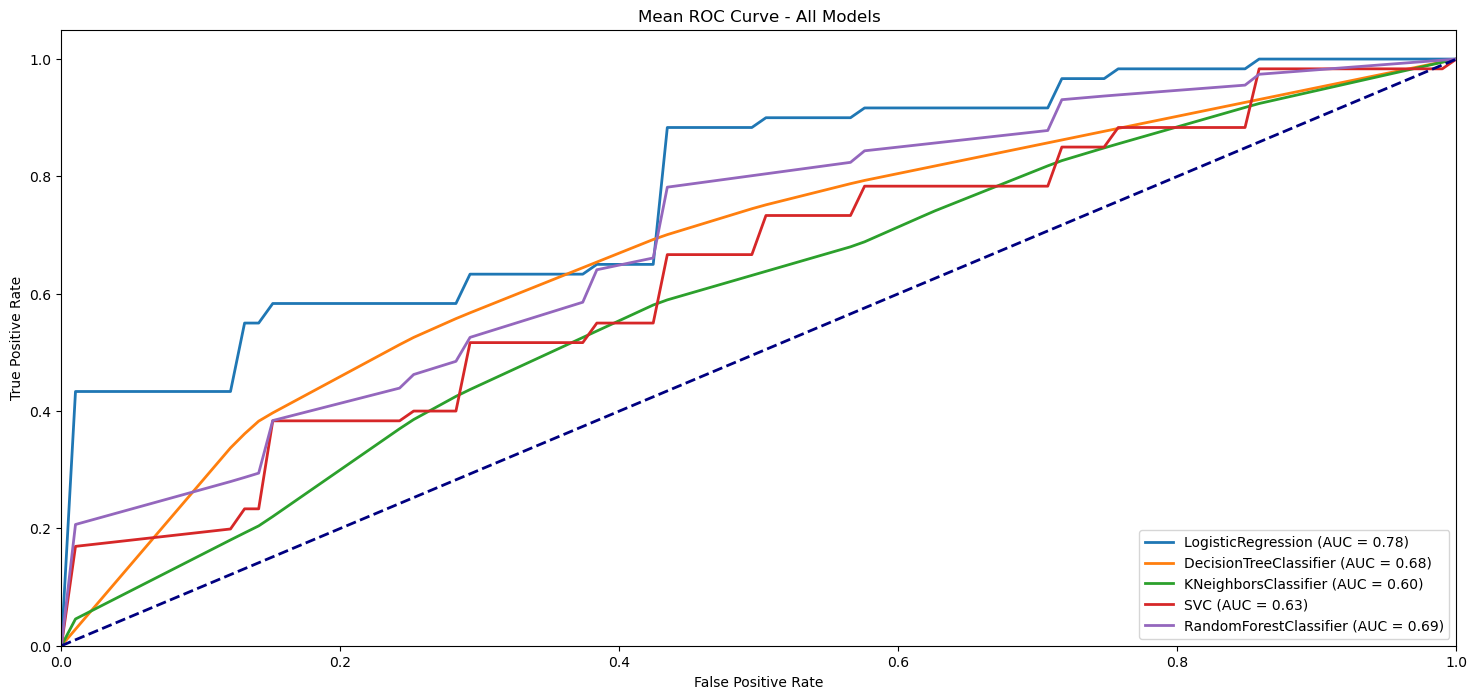

In [46]:
# definition of the ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)

rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini", min_samples_split=2, bootstrap=True,
                                 max_features='sqrt', random_state=42, min_samples_leaf=1) # Change max_features to 'sqrt'

models = [lr, dtree, neigh, svclassifier, rf_fit]

# creation of the StratifiedKFold object for the 10-fold cross-validation strategy
num_folds = 10
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# ML models training
for model in models:
    all_fpr = []
    all_tpr = []
    all_f1= []
    all_acc = []
    all_sens = []
    all_spec = []
    all_f1_scores = []

    model_name = model.__class__.__name__
    cross_val_results = cross_val_score(model, X_scaled, Y, cv=stratified_kfold, scoring='accuracy')
    all_confusion_matrices = []

    for train_index, test_index in stratified_kfold.split(X_scaled, Y):
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        # calculates the probability for the positive class
        y_prob = model.predict_proba(X_test)[:, 1]
        # calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    
        mean_fpr = np.linspace(0, 1, 100)  
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        all_fpr.append(mean_fpr)
        all_tpr.append(interp_tpr)


        predicted = model.predict(X_test)
        cm = confusion_matrix(y_test, predicted)
        f1 = f1_score(y_test, predicted)
        acc = accuracy_score(y_test, predicted)
        sens = cm[0, 0]/(cm[0, 0] + cm[0, 1])
        spec = cm[1, 1] / (cm[1, 0] + cm[1, 1])

        all_f1.append(f1)
        all_acc.append(acc)
        all_sens.append(sens)
        all_spec.append(spec)

    # calculate the average for the ROC curve
    mean_fpr = np.mean(all_fpr, axis=0)
    mean_tpr = np.mean(all_tpr, axis=0)

    # calculate the average for the F1
    mean_f1 = np.mean(all_f1)
    # add the F1 score to the list
    all_f1_scores.append(mean_f1)  # Append to the new list

    # calculate the area under the ROC curve (AUC)
    roc_auc = auc(mean_fpr, mean_tpr)

    # plot the averaged ROC curve for the model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

    # print all of the other metrices
    print(f'{model.__class__.__name__}:')
    print(f'  AUC: {np.mean(roc_auc):.2f}')
    print(f'  F1: {np.mean(all_f1):.2f}')
    print(f'  Accuracy: {np.mean(all_acc):.2f}')
    print(f'  Sensitivity: {np.mean(all_sens):.2f}')
    print(f'  Specificity: {np.mean(all_spec):.2f}')
    print()

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve - All Models')
plt.legend(loc="lower right")
plt.show()

In [45]:
#X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
 #       y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

print(Y.iloc[train_index])

Unnamed: 0
bph89        1.0
bph-umg20    1.0
bph40        1.0
bph19        1.0
bph18        1.0
            ... 
pca4         0.0
pca97        0.0
pca148       0.0
pca143       0.0
pca65        0.0
Name: Condition_Binary, Length: 120, dtype: float64


In [61]:

from sklearn.ensemble import VotingClassifier
validation_data= X_test

LogisticRegression:
  AUC: 0.78
  F1: 0.64
  Accuracy: 0.68
  Sensitivity: 0.72
  Specificity: 0.63

DecisionTreeClassifier:
  AUC: 0.64
  F1: 0.61
  Accuracy: 0.65
  Sensitivity: 0.67
  Specificity: 0.62

KNeighborsClassifier:
  AUC: 0.60
  F1: 0.47
  Accuracy: 0.57
  Sensitivity: 0.67
  Specificity: 0.45

SVC:
  AUC: 0.67
  F1: 0.46
  Accuracy: 0.59
  Sensitivity: 0.74
  Specificity: 0.40

RandomForestClassifier:
  AUC: 0.69
  F1: 0.44
  Accuracy: 0.58
  Sensitivity: 0.74
  Specificity: 0.40



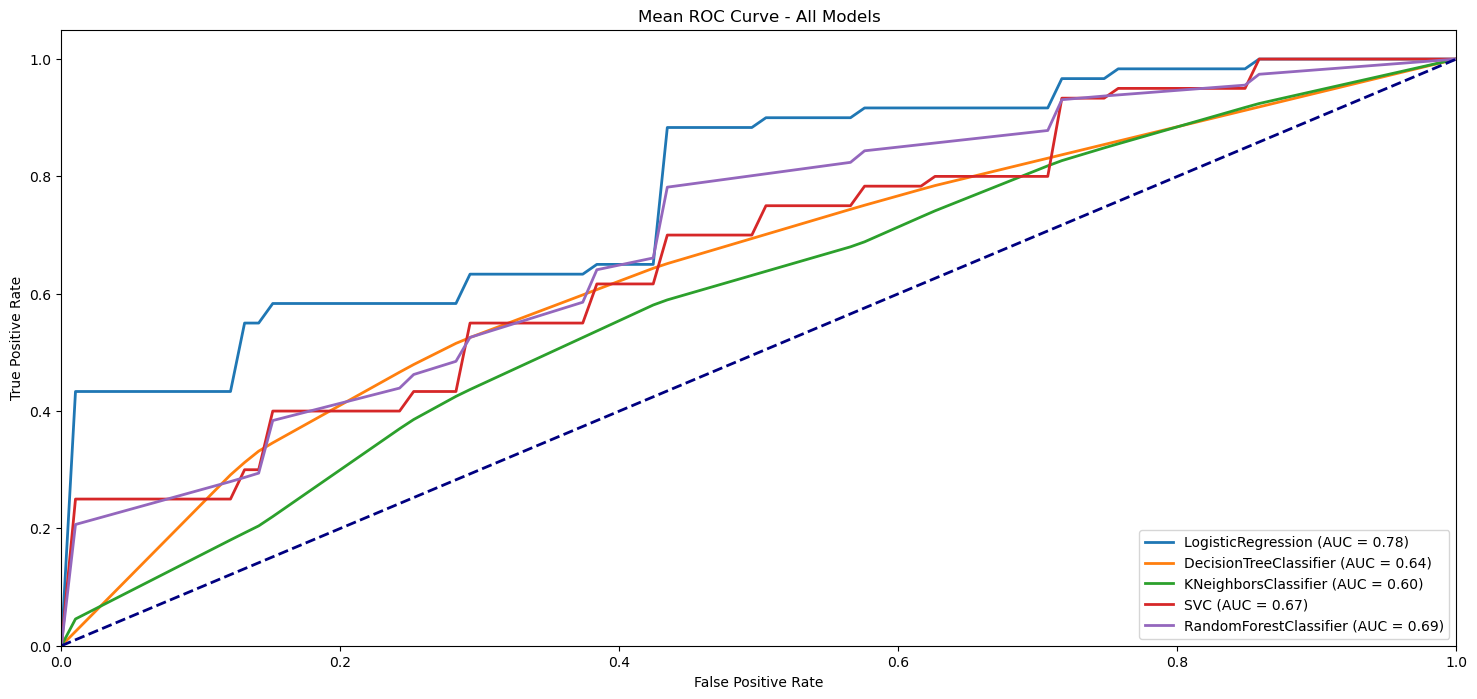

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Definition of the ML models
lr = LogisticRegression()
dtree = DecisionTreeClassifier()
neigh = KNeighborsClassifier(n_neighbors=3)
svclassifier = SVC(probability=True)  # Assuming this was defined earlier
rf_fit = RandomForestClassifier(n_estimators=20, criterion="gini", min_samples_split=2, bootstrap=True,
                                max_features='sqrt', random_state=42, min_samples_leaf=1)

models = [lr, dtree, neigh, svclassifier, rf_fit]

# Initialization of the f1_scores list
f1_scores = []

# Creation of the StratifiedKFold object for the 10-fold cross-validation strategy
num_folds = 10
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# ML models training
for model in models:
    all_fpr = []
    all_tpr = []
    all_f1 = []
    all_acc = []
    all_sens = []
    all_spec = []
    model_name = model.__class__.__name__
    all_confusion_matrices = []

    for train_index, test_index in stratified_kfold.split(X_scaled, Y):
        X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
        y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)

        mean_fpr = np.linspace(0, 1, 100)  
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        all_fpr.append(mean_fpr)
        all_tpr.append(interp_tpr)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        sens = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        spec = cm[1, 1] / (cm[1, 0] + cm[1, 1])

        all_f1.append(f1)
        all_acc.append(acc)
        all_sens.append(sens)
        all_spec.append(spec)

    mean_fpr = np.mean(all_fpr, axis=0)
    mean_tpr = np.mean(all_tpr, axis=0)

    mean_f1 = np.mean(all_f1)
    f1_scores.append(mean_f1)  # Append to the list

    roc_auc = auc(mean_fpr, mean_tpr)

    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

    print(f'{model.__class__.__name__}:')
    print(f'  AUC: {np.mean(roc_auc):.2f}')
    print(f'  F1: {np.mean(all_f1):.2f}')
    print(f'  Accuracy: {np.mean(all_acc):.2f}')
    print(f'  Sensitivity: {np.mean(all_sens):.2f}')
    print(f'  Specificity: {np.mean(all_spec):.2f}')
    print()

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve - All Models')
plt.legend(loc="lower right")
plt.show()

# Define validation dataset (e.g., the last fold's test set)
validation_data = X_test  # Assuming X_test from the last fold

# Soft voting classifier
s_voting = VotingClassifier(estimators=[
    ('Rf', rf_fit),
    ('Lr', lr),
    ('Knn', neigh),
    ('Svc', svclassifier),
    ('Dtc', dtree)],
    voting='soft',
    weights=f1_scores)

s_voting.fit(X_scaled, Y)

# Make predictions on the validation data
soft_voting = s_voting.predict(validation_data)


In [83]:
y_test

Unnamed: 0
bph46     1.0
bph103    1.0
bph33     1.0
bph115    1.0
bph117    1.0
bph106    1.0
pca87     0.0
pca5      0.0
pca80     0.0
pca136    0.0
pca120    0.0
pca3      0.0
pca139    0.0
Name: Condition_Binary, dtype: float64

In [67]:



# Define validation dataset (e.g., the last fold's test set, or a separate set)
validation_data = X_test  # Assuming X_test from the last fold

# Soft voting classifier
s_voting = VotingClassifier(estimators=[
    ('Rf', rf_fit),
    ('Lr', lr),
    ('Knn', neigh),
    ('Svc', svclassifier),
    ('Dtc', dtree)],
    voting='soft',
    weights=f1_scores)

s_voting.fit(X_scaled, Y)

# Make predictions on the validation data
soft_voting = s_voting.predict(validation_data)


In [73]:
print(soft_voting)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [69]:
# hard voting
h_voting = VotingClassifier( estimators=[ ('Rf', rf_fit),
                                          ('Lr', lr),
                                          ('Knn', neigh),
                                          ('Svc', svclassifier),
                                          ('Dtc', dtree)],
                             voting='hard')
h_voting = h_voting.fit(X_scaled, Y)
hard_voting = h_voting.predict(validation_data)

In [74]:
print(hard_voting)

[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [79]:
tab_voting = pd.DataFrame(X_test)  # Create DataFrame from validation features
tab_voting['Soft_Voting_Predictions'] = soft_voting  # Add soft voting predictions
tab_voting['Hard_Voting_Predictions'] = hard_voting  # Add hard voting predictions

# Display the combined table of features and predictions
print(tab_voting)

     Patient age  Prostate gland size  Total PSA  FT ratio   Free PSA   \
5       0.586957             0.321888   0.031197   0.705128   0.066340   
9       0.695652             0.171674   0.029701   0.679487   0.061237   
23      0.543478             0.270386   0.012221   0.474359   0.017272   
25      0.760870             0.364807   0.009333   0.474359   0.013346   
33      0.565217             0.090129   0.007116   0.423077   0.008832   
52      0.956522             0.021459   0.019079   0.269231   0.015309   
86      0.630435             0.042918   0.028825   0.230769   0.020020   
87      0.478261             0.085837   0.034394   0.217949   0.022767   
89      0.456522             0.128755   0.053524   0.205128   0.035721   
106     0.304348             0.240343   0.039653   0.166667   0.020608   
111     0.717391             0.107296   0.046305   0.147436   0.021394   
114     0.478261             0.064378   0.031867   0.141026   0.013935   
132     0.565217             0.261803 

In [82]:
# Calculate accuracy for soft voting
soft_accuracy = accuracy_score(y_test, soft_voting)
print(f"Soft Voting Accuracy: {soft_accuracy:.2f}")

# Calculate accuracy for hard voting
hard_accuracy = accuracy_score(y_test, hard_voting)
print(f"Hard Voting Accuracy: {hard_accuracy:.2f}")

Soft Voting Accuracy: 1.00
Hard Voting Accuracy: 1.00
